In [96]:
import numpy as np                                                              # manipulação de matrizes/vetores
import pandas as pd                                                             # manipulação de datasets
import seaborn as sn                                                            # visualização de dados
import matplotlib                                                               # visualização de dados
import matplotlib.pyplot as plt                                                 # visualização de dados
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)                              # ajustar tamanho padrão dos gráficos
import sklearn as skl
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt                                                           # calculo raiz quadrada
from statistics import mean                                                     # calculo media

In [97]:
# importando o conjunto de dados "Boston"

from sklearn.datasets import load_boston
boston = load_boston()

# converter os dados em formato de DataFrame
df = pd.DataFrame(boston.data)
df.head()

# Trocar indices pelos verdadeiros nomes de cada coluna
df.columns = boston.feature_names

# Adicionar variável alvo ao dataframe
df['MEDV'] = boston.target

## 1. Usando apenas 'LSTAT' como variável preditora

In [98]:
# Separar o conjunto em X e Y
X = df['LSTAT'] 
y = df['MEDV']

# reformatar o eixo X para não termos problemas com os métodos dos regressores                                                   
X = X.values.reshape(-1,1)



###1a. Regressão linear

In [99]:
# importar o regressor
from sklearn import linear_model

# instanciar o objeto do regressor
regr_lin = linear_model.LinearRegression()

# lista com o EQM de cada repetição do holdout
lista_EQM = []

for i in range(1000):
  X_treino, X_teste, y_treino, y_teste = skl.model_selection.train_test_split(
      X, y, test_size = 0.25)
  regr_lin.fit(X_treino, y_treino)
  y_pred = regr_lin.predict(X_teste)
  # adicionar o EQM na lista
  lista_EQM.append(mean_squared_error(y_teste, y_pred))

# retornar a média dos EQMs
EQM_regr = round(mean(lista_EQM), 2)
print(f'EQM médio com regressão linear: {EQM_regr}')
  



EQM médio com regressão linear: 38.87


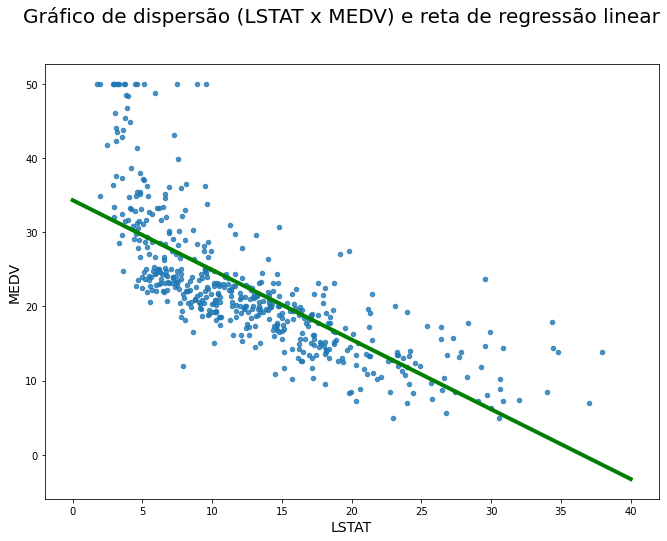

In [100]:
plt.scatter(X,y, alpha = 0.8, s= 20)
plt.xlabel('LSTAT', fontsize= 14)
plt.ylabel('MEDV', fontsize= 14)
plt.suptitle('Gráfico de dispersão (LSTAT x MEDV) e reta de regressão linear',
             fontsize= 20)
aleat = np.arange(0,41).reshape(-1,1)
preds = regr_lin.predict(aleat)
plt.plot(aleat, preds, 'green', linewidth= 4)
plt.show()

###1b. K-vizinhos mais próximos

In [101]:
# importando o algoritmo do knn
from sklearn import neighbors 

In [102]:
# lista para armazenar o EQM médio de cada k do intervalo de [1, 51)
lista1_EQM = []

for i in range(1, 51):
  # lista para armazenar cada uma das 1000 repetições do holdout
  lista2_EQM = []

  for j in range(1000):
    X_treino, X_teste, y_treino, y_teste = skl.model_selection.train_test_split(
        X, y, test_size = 0.25)
    knn = neighbors.KNeighborsRegressor(n_neighbors= i)
    knn.fit(X_treino, y_treino)
    y_pred = knn.predict(X_teste)
    lista2_EQM.append(mean_squared_error(y_teste, y_pred))

  lista1_EQM.append(mean(lista2_EQM))

k_opt = lista1_EQM.index(min(lista1_EQM)) + 1
EQM_knn = round(lista1_EQM[k_opt - 1], 2)

print(f'EQM médio da solução óptima do KNN: {EQM_knn}')
print(f'K óptimo: {k_opt}')

EQM médio da solução óptima do KNN: 27.14
K óptimo: 32


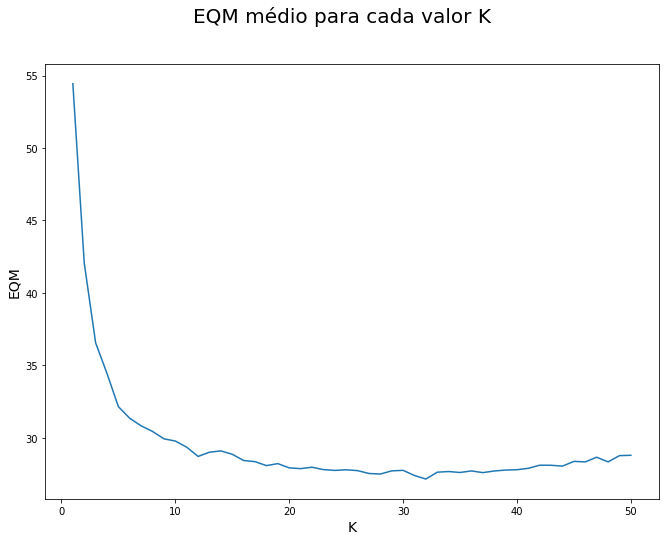

In [103]:
# grafico do EQM médio para cada valor de K no intervalo [1,51)
plt.plot(list(range(1,51)), lista1_EQM)
plt.xlabel('K', fontsize= 14)
plt.ylabel('EQM médio', fontsize= 14)
plt.suptitle('EQM médio para cada valor K',
             fontsize= 20)
plt.show()

Verifica-se que a variação negativa do EQM é bem alta nos valores inicias de K mas vai diminuindo aos poucos, ficando razoavelmente estável entre o intervalo aproximado de K = 28 e K = 37, e aumentando progressivamente depois.

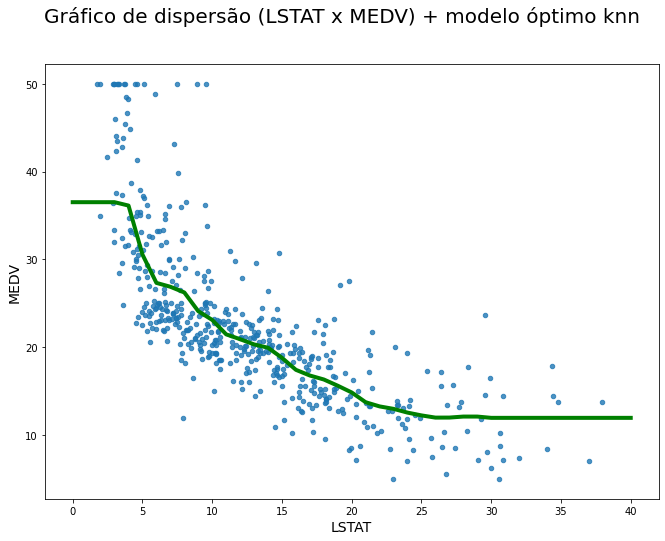

In [104]:
plt.scatter(X,y, alpha= 0.8, s= 20)
plt.xlabel('LSTAT', fontsize= 14)
plt.ylabel('MEDV', fontsize= 14)
plt.suptitle('Gráfico de dispersão (LSTAT x MEDV) + modelo óptimo knn',
             fontsize= 20)
preds2 = knn.predict(aleat)
plt.plot(aleat, preds2, 'green', linewidth= 4)
plt.show()

###1c. Árvore de decisão

In [105]:
# importar o regressor
from sklearn.tree import DecisionTreeRegressor

# fazer o holdout repetido para cada valor de max_depth e min_split dentro dos intervalos de [1,5] e [2,10], respectivamente

# lista para armazenar o EQM de cada combinacao de max_depth x min_split
lista1_EQM = []
for i in range(1,6):

  for j in range(2,11):
    
# lista para armazenar os 1000 valores do holdout
    lista2_EQM = []

    for k in range(1000):
      X_treino, X_teste, y_treino, y_teste = skl.model_selection.train_test_split(
      X, y, test_size = 0.25)
      arv_dec = DecisionTreeRegressor(max_depth = i, min_samples_split= j)
      arv_dec.fit(X_treino, y_treino)
      y_pred = arv_dec.predict(X_teste)
      lista2_EQM.append(mean_squared_error(y_teste, y_pred))
    
    lista1_EQM.append(mean(lista2_EQM))

solucao_optima = lista1_EQM.index(min(lista1_EQM)) + 1
if 9 >= solucao_optima >= 1:
  mx_dpth_optm = 1
elif 18 >= solucao_optima > 9:
  mx_dpth_optm = 2
elif 27 >= solucao_optima > 18:
  mx_dpth_optm = 3
elif 36 >= solucao_optima > 27:
  mx_dpth_optm = 4
else:
  mx_dpth_optm = 5

if solucao_optima < 9:
  min_splt_optm = solucao_optima + 1
else:
  if (solucao_optima % 9) == 0:
    min_splt_optm = 10
  else:
    min_splt_optm = solucao_optima % 9 + 1

EQM_ArvDec = round(lista1_EQM[solucao_optima -1],2)

print(f'EQM da solução óptima: {EQM_ArvDec}')
print(f'max_depth óptimo: {mx_dpth_optm}')
print(f'min_samples_split óptimo: {min_splt_optm}')

EQM da solução óptima: 29.79
max_depth óptimo: 3
min_samples_split óptimo: 6


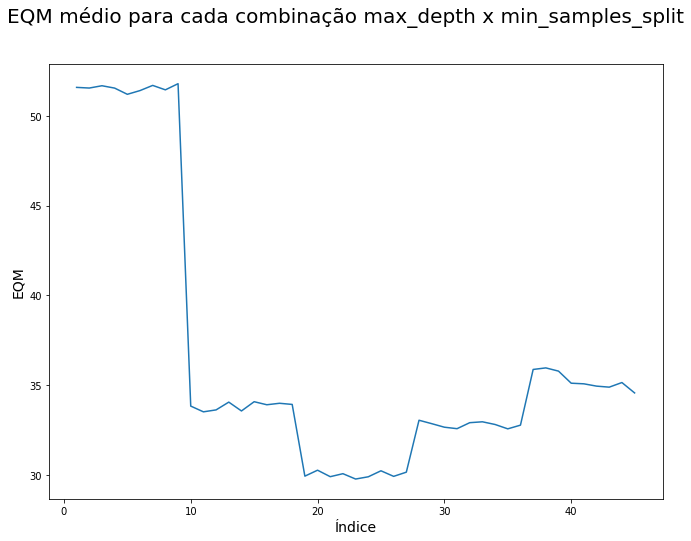

In [106]:
# grafico do EQM médio para cada combinação
plt.plot(list(range(1,46)), lista1_EQM)
plt.xlabel('Índice', fontsize= 14)
plt.ylabel('EQM médio', fontsize= 14)
plt.suptitle('EQM médio para cada combinação max_depth x min_samples_split',
             fontsize= 20)
plt.show()

Em primeiro lugar, é evidente que a performance do algoritmo de árvore de decisão tem a maior variação quando o valor de max_depth varia. Por exemplo, dentre as combinações de índice 19 a 27, que possuem os menores valores de EQM médio e cujo valor de max_depth é igual a 3 - não há muita diferença no valor do erro médio, que sempre fica em torno de 29/30. 

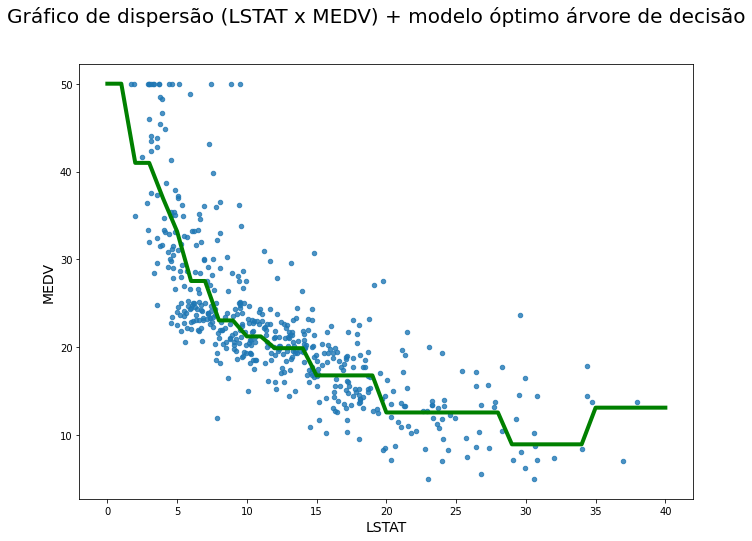

In [107]:
plt.scatter(X,y, alpha= 0.8, s= 20)
plt.xlabel('LSTAT', fontsize= 14)
plt.ylabel('MEDV', fontsize= 14)
plt.suptitle('Gráfico de dispersão (LSTAT x MEDV) + modelo óptimo árvore de decisão',
             fontsize= 20)
preds3 = arv_dec.predict(aleat)
plt.plot(aleat, preds3, 'green', linewidth= 4)
plt.show()

Podemos perceber que o modelo de árvore de decisão é menos "suave" do que o modelo do K-vizinhos mais próximos - provavelmente um reflexo de um overfitting com o conjunto de treino maior do que o do outro algoritmo.

### 1d. Conclusão

O *ranking* da performance dos modelos, com base no EQM e usando apenas a variável `LSTAT` como preditora, foi portanto:

- 1º: **K-vizinhos mais próximos**; EQM: 27.14; K: 32
- 2º: Árvore de decisão; EQM: 29.79; max_depth = 3; min_samples_split = 6
- 3º: Regressão linear; EQM: 38.87

Não podemos esquecer que o valor de MEDV está em milhares de dólares, portanto, acredito que nenhum dos modelos obtiveram uma performance minimamente satisfatória.

##2º cenário: Usando todas as variáveis preditoras

In [108]:
# adicionar as demais variáveis em X
X = df.iloc[:, :df.shape[1] - 1]
# y se mantém o mesmo, portanto não mudamos nada

###2a. Regressão linear

In [109]:
regr_lin = linear_model.LinearRegression()
lista_EQM = []

for i in range(1000):
  X_treino, X_teste, y_treino, y_teste = skl.model_selection.train_test_split(
      X, y, test_size = 0.25)
  regr_lin.fit(X_treino, y_treino)
  y_pred = regr_lin.predict(X_teste)
  lista_EQM.append(mean_squared_error(y_teste, y_pred))

EQM_regr = round(mean(lista_EQM),2)
print(EQM_regr)

24.09


###2b. K-vizinhos mais próximos

In [110]:
lista1_EQM = []

for i in range(1,51):
  lista2_EQM = []

  for j in range(1000):
    X_treino, X_teste, y_treino, y_teste = skl.model_selection.train_test_split(
        X, y, test_size = 0.25)
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_treino, y_treino)
    y_pred = knn.predict(X_teste)
    lista2_EQM.append(mean_squared_error(y_teste, y_pred))

  lista1_EQM.append(mean(lista2_EQM))

k_opt = lista1_EQM.index(min(lista1_EQM)) + 1
EQM_knn = round(lista1_EQM[k_opt - 1], 2)

print(f'EQM médio da solução óptima do KNN: {EQM_knn}')
print(f'K óptimo: {k_opt}')

EQM médio da solução óptima do KNN: 40.58
K óptimo: 3


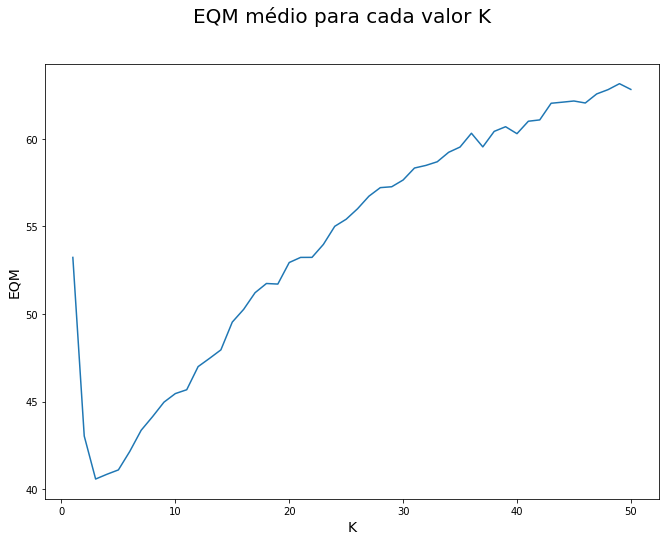

In [111]:
# grafico do EQM médio para cada valor de K no intervalo [1,51)
plt.plot(list(range(1,51)), lista1_EQM)
plt.xlabel('K', fontsize= 14)
plt.ylabel('EQM médio', fontsize= 14)
plt.suptitle('EQM médio para cada valor K',
             fontsize= 20)
plt.show()

Ao contrário do exemplo com apenas uma variável preditora, verifica-se que a variação do EQM médio é negativa apenas até o valor de K=3, atingindo um mínimo pouco maior que 40; para valores maiores, o erro aumenta progressivamente.

###2c. Árvore de decisão

In [112]:
lista1_EQM = []
for i in range(1,6):

  for j in range(2,11):

    lista2_EQM = []

    for k in range(1000):
      X_treino, X_teste, y_treino, y_teste = skl.model_selection.train_test_split(
      X, y, test_size = 0.25)
      arv_dec = DecisionTreeRegressor(max_depth = i, min_samples_split= j)
      arv_dec.fit(X_treino, y_treino)
      y_pred = arv_dec.predict(X_teste)
      lista2_EQM.append(mean_squared_error(y_teste, y_pred))
    
    lista1_EQM.append(mean(lista2_EQM))

solucao_optima = lista1_EQM.index(min(lista1_EQM)) + 1
if 9 >= solucao_optima >= 1:
  mx_dpth_optm = 1
elif 18 >= solucao_optima > 9:
  mx_dpth_optm = 2
elif 27 >= solucao_optima > 18:
  mx_dpth_optm = 3
elif 36 >= solucao_optima > 27:
  mx_dpth_optm = 4
else:
  mx_dpth_optm = 5

if solucao_optima < 9:
  min_splt_optm = solucao_optima + 1
else:
  if (solucao_optima % 9) == 0:
    min_splt_optm = 10
  else:
    min_splt_optm = solucao_optima % 9 + 1

EQM_ArvDec = round(lista1_EQM[solucao_optima -1],2)

print(f'EQM da solução óptima: {EQM_ArvDec}')
print(f'max_depth óptimo: {mx_dpth_optm}')
print(f'min_samples_split óptimo: {min_splt_optm}')

EQM da solução óptima: 20.42
max_depth óptimo: 5
min_samples_split óptimo: 7


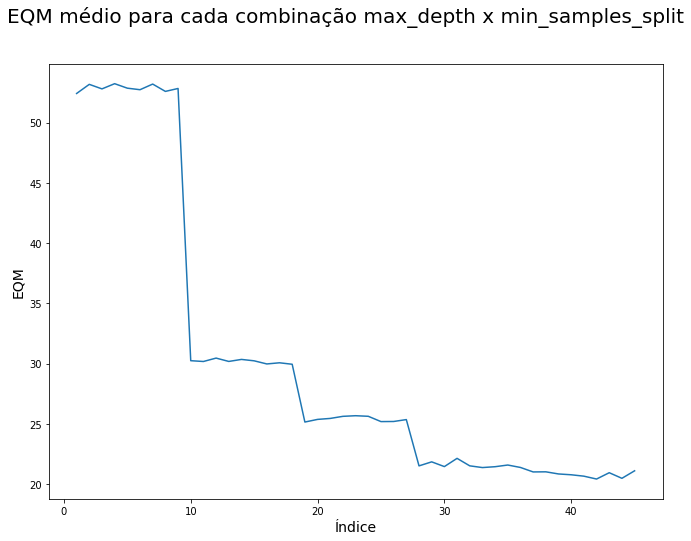

In [113]:
plt.plot(list(range(1,46)), lista1_EQM)
plt.xlabel('Índice', fontsize= 14)
plt.ylabel('EQM médio', fontsize= 14)
plt.suptitle('EQM médio para cada combinação max_depth x min_samples_split',
             fontsize= 20)
plt.show()

Percebemos que o EQM médio praticamente sempre diminui a medida em que o valor de max_depth aumenta, diferente do exemplo com apenas uma variável preditora, em que após um mínimo com max_depth=3, os erros aumentavam para os valores 4 e 5. 

No entanto, o comportamento da variação, que é maior quando o valor de max_depth muda, e menor entre os valores de min_samples_split de um mesmo max_depth, é o mesmo.

### 2d. Conclusão 

O *ranking* da performance dos modelos, com base no EQM e utilizando todas as  variáveis disponíveis, foi portanto:

- 1º: **Árvore de decisão**; EQM: 20.42; max_depth = 5; min_samples_split = 5
- 2º: Regressão linear; EQM: 24.09; 
- 3º: K-vizinhos mais próximos; EQM: 40.58; K = 4

Podemos concluir que a adição de mais variáveis foi benéfica para a performance dos algoritmos de árvore de decisão e regressão linear (principalmente para o segundo, visto que obteve a diminuição de EQM mais notável, menor em 14.78/38%). No entanto, o oposto ocorreu com o K-vizinhos mais próximos, que obteve o pior desempenho, consequência de um notável aumento de 13.44/49.5% no EQM.

Novamente ressalto que os modelos não obtiveram um desempenho satisfatório, tendo em vista a escala da variável `MEDV`.